In [68]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy, scipy.stats
from sklearn.linear_model import LinearRegression
import math

In [69]:
def get_xTx_inv(dataframe):
    import numpy as np
    # Get number of obs
    n=dataframe.shape[0]
    # Number of variables
    m=dataframe.shape[1]
    # Create a row of 1's with the same num of rows as x
    ones=np.ones(n)
    # Grab only the independant variables
    X_mat=dataframe.iloc[:,:-1]
    # Use column stack to augment with ones
    c = np.c_[ones,X_mat]
    # Create xT
    xT = c.transpose()
    # Create xTx
    xTx=np.dot(c.transpose(),c)
    # Invert xTx
    xTx_inv=np.linalg.inv(xTx)
    # Print xTx_inv
    return(xTx_inv,xTx,xT)

def multi_reg_table(dataframe):

    l=['Intercept']
    for item in dataframe.columns[:-1]:
        l.append(item)
   
    cols = {'Variables': l}
   
    tstats_tab = pd.DataFrame(cols)
    tstats_tab.head()
    
    X=dataframe.iloc[:,:-1]
    Y=dataframe.Y
    
    cln = LinearRegression()
    mod = cln.fit(X,Y)
    
    li = [mod.intercept_]
    
    for item in mod.coef_:
        li.append(item)

    tstats_tab['val'] = li
    
    xTx_inv,xTx_trans,x_trans=get_xTx_inv(dataframe)
    n=xTx_inv.shape[0]
    var_coef=[]
    for i in range(0,n):
        var_coef.append(xTx_inv[i,i])
    tstats_tab['Var_Coef'] = var_coef

    ind_rows=[]
    n=tstats_tab.shape[0]
    
    for i in range(1,n):
        ind_rows.append(dataframe.loc[:,tstats_tab.Variables[i]]*tstats_tab.val[i])
    nump = np.array(ind_rows)
    yhat=np.sum(nump,axis=0)+tstats_tab.val[0]
    
    
    n=dataframe.shape[0]
    m=dataframe.shape[1]
    
    SSE = sum((yhat-dataframe.Y)**2)
    s_sq = SSE/(n-m)
    SSR = sum((yhat-dataframe.Y.mean())**2)
    SST = sum(dataframe.Y**2)-n*dataframe.Y.mean()**2
    R_sq = SSR/SST
    print("SSE:", SSE)
    print("SSR:", SSR)
    print("SST:", SST)
    print("R^2:", R_sq)
    tstats_tab['st_dev'] = (tstats_tab.Var_Coef * s_sq).apply(lambda x: math.sqrt(x))
    tstats_tab['t_obs']=tstats_tab.val/tstats_tab.st_dev
    tstats_tab['p']=scipy.stats.t.sf(np.abs(tstats_tab.t_obs),n-m)*2
    return(tstats_tab)

def printmats(dataframe):
    xTx_inv,xTx_trans,xT=get_xTx_inv(dataframe)
    print('X Transposed\n')
    print(xT)
    print()
    print('XTX Tranposed\n')
    print(xTx_trans)
    print()
    print('XTX Inverse\n')
    print(xTx_inv)
    print()
    print("XTY\n")
    xTY=np.dot(xT,dataframe.Y)
    print(xTY)
    print()
    print("B\n")
    B=np.dot(xTx_inv,xTY)
    print(B)
    print()
    print('BT*XTY\n')
    bt_xty=np.dot(B,xTY)
    print(bt_xty)
    print()
    print('Sum of Y_sq\n')
    y_sq_sum=sum(dataframe.Y**2)
    print(y_sq_sum)
    print()
    print('SSE:\n')
    print(y_sq_sum-bt_xty)
    print()

In [70]:
# Assign 2 Question 1
x = np.matrix('1,-1,83;1,1,113;-1,1,92;-1,-1,82;0,0,100;0,0,96;0,0,98;0,1.5,95;0,-1.5,80;1.5,0,100;-1.5,0,92')
df= pd.DataFrame(x)
df.columns=['X1','X2','Y']
df['X2_sq']=df.X2**2
df['X1X2']=df.X1*df.X2
df['X1_sq']=df.X1**2


In [71]:
# Switch columns
cols=df.columns.tolist()
t=cols[-1]
cols[-1]=cols[2]
cols[2]=t
cols

['X1', 'X2', 'X1_sq', 'X2_sq', 'X1X2', 'Y']

In [72]:
df=df[cols]
df

,X1,X2,X1_sq,X2_sq,X1X2,Y
0,1.0,-1.0,1.00,1.00,-1.0,83.0
1,1.0,1.0,1.00,1.00,1.0,113.0
2,-1.0,1.0,1.00,1.00,-1.0,92.0
3,-1.0,-1.0,1.00,1.00,1.0,82.0
4,0.0,0.0,0.00,0.00,0.0,100.0
5,0.0,0.0,0.00,0.00,0.0,96.0
6,0.0,0.0,0.00,0.00,0.0,98.0
7,0.0,1.5,0.00,2.25,0.0,95.0
8,0.0,-1.5,0.00,2.25,-0.0,80.0
9,1.5,0.0,2.25,0.00,0.0,100.0


In [73]:
# Question 1 Matrices and Y_Sq Sum
XTX_inv,XTX_trans,XT=get_xTx_inv(df)
printmats(df)
DF = multi_reg_table(df)
DF

X Transposed

[[ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.   -1.    0.    0.    0.    0.    0.    1.5  -1.5 ]
 [-1.    1.    1.   -1.    0.    0.    0.    1.5  -1.5   0.    0.  ]
 [ 1.    1.    1.    1.    0.    0.    0.    0.    0.    2.25  2.25]
 [ 1.    1.    1.    1.    0.    0.    0.    2.25  2.25  0.    0.  ]
 [-1.    1.   -1.    1.    0.    0.    0.    0.   -0.    0.   -0.  ]]

XTX Tranposed

[[ 11.      0.      0.      8.5     8.5     0.   ]
 [  0.      8.5     0.      0.      0.      0.   ]
 [  0.      0.      8.5     0.      0.      0.   ]
 [  8.5     0.      0.     14.125   4.      0.   ]
 [  8.5     0.      0.      4.     14.125   0.   ]
 [  0.      0.      0.      0.      0.      4.   ]]

XTX Inverse

[[ 0.33029613  0.          0.         -0.15489749 -0.15489749  0.        ]
 [ 0.          0.11764706  0.          0.          0.          0.        ]
 [ 0.          0.          0.11764706  0.          0.          0.        ]
 [-0.1548

,Variables,val,Var_Coef,st_dev,t_obs,p
0,Intercept,98.004556,0.330296,2.269182,43.189384,1.255820e-07
1,X1,4.000000,0.117647,1.354279,2.953602,3.175284e-02
2,X2,7.352941,0.117647,1.354279,5.429415,2.873203e-03
3,X1_sq,-0.878765,0.149611,1.527209,-0.575406,5.899417e-01
4,X2_sq,-4.656543,0.149611,1.527209,-3.049053,2.845504e-02
5,X1X2,5.000000,0.250000,1.974184,2.532693,5.235784e-02


In [74]:
# Another Method Decimals
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
from sklearn.linear_model import LinearRegression
cln = LinearRegression()
mod = cln.fit(X,Y)
print('Coeffs:',mod.coef_)
print('Intercept:',mod.intercept_)

Coeffs: [ 4.          7.35294118 -0.87876487 -4.65654265  5.        ]
Intercept: 98.0045558087


In [75]:
def createyhat(data1,data2):
    test=[]
    num=data2.shape[0]

    for i in range(1,num):
        test.append(data1.loc[:,data2.Variables[i]]*data2.val[i])
    nump = np.array(test)
    yhat=np.sum(nump,axis=0)+data2.val[0]

    data1['yhat']=yhat
    data1['y-yhat']=data1.Y-data1.yhat
    data1['y-yhat_sq']=data1['y-yhat']**2
    data1 = data1.append(data1.sum(),ignore_index=True)
    data1 = data1.rename(index={data1.shape[0]-1:'total'}) 
    return(data1)

df_yhat=createyhat(df,DF)
df_yhat

,X1,X2,X1_sq,X2_sq,X1X2,Y,yhat,y-yhat,y-yhat_sq
0,1.0,-1.0,1.00,1.00,-1.0,83.0,84.116307,-1.116307,1.246142
1,1.0,1.0,1.00,1.00,1.0,113.0,108.822189,4.177811,17.454101
2,-1.0,1.0,1.00,1.00,-1.0,92.0,90.822189,1.177811,1.387238
3,-1.0,-1.0,1.00,1.00,1.0,82.0,86.116307,-4.116307,16.943984
4,0.0,0.0,0.00,0.00,0.0,100.0,98.004556,1.995444,3.981798
5,0.0,0.0,0.00,0.00,0.0,96.0,98.004556,-2.004556,4.018244
6,0.0,0.0,0.00,0.00,0.0,98.0,98.004556,-0.004556,0.000021
7,0.0,1.5,0.00,2.25,0.0,95.0,98.556747,-3.556747,12.650446
8,0.0,-1.5,0.00,2.25,-0.0,80.0,76.497923,3.502077,12.264543
9,1.5,0.0,2.25,0.00,0.0,100.0,102.027335,-2.027335,4.110087


In [76]:
print('SSE:')
print(df['y-yhat_sq'].sum())

SSE:
77.94801018357224


In [77]:
# Question 1 C
redDF=pd.DataFrame(x)
redDF.columns=['X1','X2','Y']
redDF

,X1,X2,Y
0,1.0,-1.0,83.0
1,1.0,1.0,113.0
2,-1.0,1.0,92.0
3,-1.0,-1.0,82.0
4,0.0,0.0,100.0
5,0.0,0.0,96.0
6,0.0,0.0,98.0
7,0.0,1.5,95.0
8,0.0,-1.5,80.0
9,1.5,0.0,100.0


In [78]:
printmats(redDF)

X Transposed

[[ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1. ]
 [ 1.   1.  -1.  -1.   0.   0.   0.   0.   0.   1.5 -1.5]
 [-1.   1.   1.  -1.   0.   0.   0.   1.5 -1.5  0.   0. ]]

XTX Tranposed

[[ 11.    0.    0. ]
 [  0.    8.5   0. ]
 [  0.    0.    8.5]]

XTX Inverse

[[ 0.09090909  0.          0.        ]
 [ 0.          0.11764706  0.        ]
 [ 0.          0.          0.11764706]]

XTY

[ 1031.     34.     62.5]

B

[ 93.72727273   4.           7.35294118]

BT*XTY

97228.3770053

Sum of Y_sq

97555.0

SSE:

326.622994652



In [79]:
XTX_inv,XTX_trans,XT=get_xTx_inv(redDF)
redCo = multi_reg_table(redDF)
redCo

SSE: 326.622994652
SSR: 595.558823529
SST: 922.181818182
R^2: 0.64581497031


,Variables,val,Var_Coef,st_dev,t_obs,p
0,Intercept,93.727273,0.090909,1.926558,48.650122,3.525906e-11
1,X1,4.000000,0.117647,2.191639,1.825119,1.054225e-01
2,X2,7.352941,0.117647,2.191639,3.354997,1.000579e-02


In [80]:
X=redDF.iloc[:,:-1]
Y=redDF.iloc[:,-1]
from sklearn.linear_model import LinearRegression
cln = LinearRegression()
mod = cln.fit(X,Y)
print('b1 and b2:',mod.coef_)
print('Intercept:',mod.intercept_)

b1 and b2: [ 4.          7.35294118]
Intercept: 93.7272727273


In [81]:
# Q 1 C Reduced Table
df_Red_yhat=createyhat(redDF,redCo)
df_Red_yhat

,X1,X2,Y,yhat,y-yhat,y-yhat_sq
0,1.0,-1.0,83.0,90.374332,-7.374332e+00,54.380766
1,1.0,1.0,113.0,105.080214,7.919786e+00,62.723012
2,-1.0,1.0,92.0,97.080214,-5.080214e+00,25.808573
3,-1.0,-1.0,82.0,82.374332,-3.743316e-01,0.140124
4,0.0,0.0,100.0,93.727273,6.272727e+00,39.347107
5,0.0,0.0,96.0,93.727273,2.272727e+00,5.165289
6,0.0,0.0,98.0,93.727273,4.272727e+00,18.256198
7,0.0,1.5,95.0,104.756684,-9.756684e+00,95.192892
8,0.0,-1.5,80.0,82.697861,-2.697861e+00,7.278454
9,1.5,0.0,100.0,99.727273,2.727273e-01,0.074380


In [82]:
# Q 1F
scipy.stats.f.sf(5.317112087,3,5)

0.051599299245560733

In [83]:
# Q 1F Alternate Code
1-scipy.stats.f.cdf(5.317112087,3,5)

0.051599299245560837

In [84]:
# Q 2 C
scipy.stats.f.isf(0.05,3,11)

3.5874337024204936

In [85]:
# Q 2 C
scipy.stats.t.isf(0.025,11)

2.2009851600829489

In [86]:
# Q 2 C
print(scipy.stats.t.sf(3.0714,11)*2)
print(scipy.stats.t.sf(4.184615384,11)*2)
print(scipy.stats.t.sf(2.470588235,11)*2)

0.0106333057802
0.0015246310808
0.031088963019


In [87]:
# Question 2 graph
graph_data = np.matrix('0,3.76,3.965;1,5.05,5.255;2,6.34,6.545;3,7.63,7.835;4,8.92,9.125;5,10.21,10.415;6,11.5,11.705;7,12.79,12.995;8,14.08,14.285;9,15.37,15.575;10,16.66,16.865')

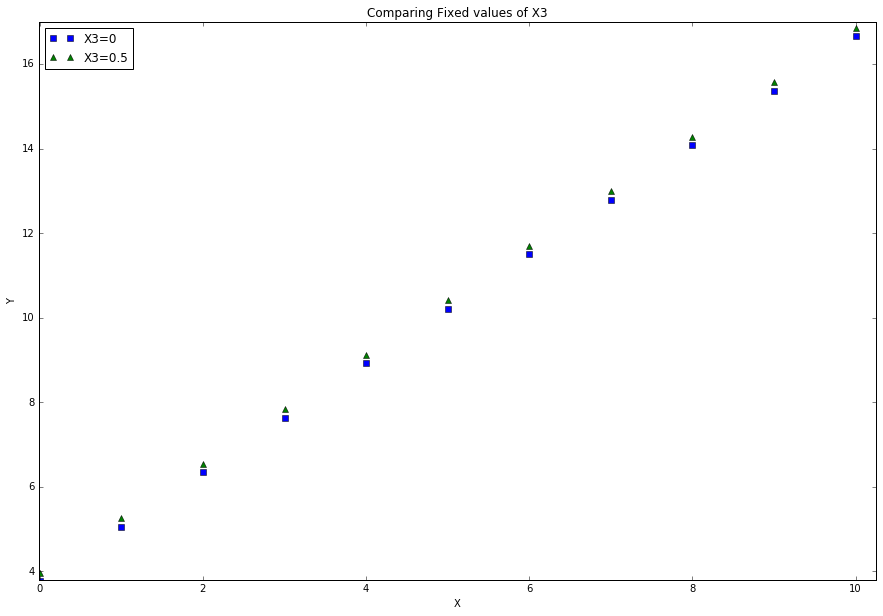

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(graph_data[:,0],graph_data[:,1],'bs',label='X3=0',markersize=6)
plt.plot(graph_data[:,0],graph_data[:,2],'g^',label='X3=0.5',markersize=6)
plt.ylim(3.8,17)
plt.xlim(-0.01,10.25)
plt.ylabel('Y')
plt.xlabel('X')
plt.title("Comparing Fixed values of X3")
plt.legend(loc=2)
plt.show()

In [89]:
# Question 3 A
x = np.matrix('25,4,15;1,5,16;6,3,2;30,1,3;29,2,12;20,0,1;12,4,16;15,5,18;6,4,13;16,2,2')
df= pd.DataFrame(x)
df.columns=['X1','X2','Y']
XTX_inv,XTX,XT = get_xTx_inv(df)
printmats(df)
dfCoef=multi_reg_table(df)
dfCoef

X Transposed

[[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ 25.   1.   6.  30.  29.  20.  12.  15.   6.  16.]
 [  4.   5.   3.   1.   2.   0.   4.   5.   4.   2.]]

XTX Tranposed

[[   10.   160.    30.]
 [  160.  3464.   390.]
 [   30.   390.   116.]]

XTX Inverse

[[ 1.62116333 -0.04453389 -0.26954038]
 [-0.04453389  0.00168787  0.00584264]
 [-0.26954038  0.00584264  0.05868606]]

XTY

[   98.  1433.   383.]

B

[-8.17701896  0.29213191  4.43430278]

BT*XTY

1315.61513892

Sum of Y_sq

1392

SSE:

76.384861075

SSE: 76.384861075
SSR: 355.215138925
SST: 431.6
R^2: 0.823019320957


,Variables,val,Var_Coef,st_dev,t_obs,p
0,Intercept,-8.177019,1.621163,4.205988,-1.944138,0.092967
1,X1,0.292132,0.001688,0.135714,2.152556,0.068355
2,X2,4.434303,0.058686,0.800243,5.541193,0.000868


In [90]:
df['Y_sq']=df.Y**2
df

,X1,X2,Y,Y_sq
0,25,4,15,225
1,1,5,16,256
2,6,3,2,4
3,30,1,3,9
4,29,2,12,144
5,20,0,1,1
6,12,4,16,256
7,15,5,18,324
8,6,4,13,169
9,16,2,2,4


In [91]:
dfQ3A_yhat=createyhat(df,dfCoef)
dfQ3A_yhat

,X1,X2,Y,Y_sq,yhat,y-yhat,y-yhat_sq
0,25.0,4.0,15.0,225.0,16.863490,-1.863490e+00,3.472595
1,1.0,5.0,16.0,256.0,14.286627,1.713373e+00,2.935648
2,6.0,3.0,2.0,4.0,6.878681,-4.878681e+00,23.801527
3,30.0,1.0,3.0,9.0,5.021241,-2.021241e+00,4.085416
4,29.0,2.0,12.0,144.0,9.163412,2.836588e+00,8.046231
5,20.0,0.0,1.0,1.0,-2.334381,3.334381e+00,11.118095
6,12.0,4.0,16.0,256.0,13.065775,2.934225e+00,8.609676
7,15.0,5.0,18.0,324.0,18.376474,-3.764736e-01,0.141732
8,6.0,4.0,13.0,169.0,11.312984,1.687016e+00,2.846024
9,16.0,2.0,2.0,4.0,5.365697,-3.365697e+00,11.327918


In [92]:
dfRed=df.drop(['X2','Y_sq'],axis=1)
dfRed

,X1,Y,yhat,y-yhat,y-yhat_sq
0,25,15,16.863490,-1.863490,3.472595
1,1,16,14.286627,1.713373,2.935648
2,6,2,6.878681,-4.878681,23.801527
3,30,3,5.021241,-2.021241,4.085416
4,29,12,9.163412,2.836588,8.046231
5,20,1,-2.334381,3.334381,11.118095
6,12,16,13.065775,2.934225,8.609676
7,15,18,18.376474,-0.376474,0.141732
8,6,13,11.312984,1.687016,2.846024
9,16,2,5.365697,-3.365697,11.327918


In [93]:
printmats(dfRed)

X Transposed

[[  1.           1.           1.           1.           1.           1.
    1.           1.           1.           1.        ]
 [ 25.           1.           6.          30.          29.          20.
   12.          15.           6.          16.        ]
 [ 15.          16.           2.           3.          12.           1.
   16.          18.          13.           2.        ]
 [ 16.86349     14.28662685   6.87868086   5.02124124   9.1634121
   -2.33438068  13.06577512  18.37647364  11.31298364   5.36569722]
 [ -1.86349      1.71337315  -4.87868086  -2.02124124   2.8365879
    3.33438068   2.93422488  -0.37647364   1.68701636  -3.36569722]]

XTX Tranposed

[[  1.00000000e+01   1.60000000e+02   9.80000000e+01   9.80000000e+01
    3.55271368e-15]
 [  1.60000000e+02   3.46400000e+03   1.43300000e+03   1.43300000e+03
    1.56319402e-13]
 [  9.80000000e+01   1.43300000e+03   1.39200000e+03   1.31561514e+03
    7.63848611e+01]
 [  9.80000000e+01   1.43300000e+03   1.31561514e+

In [94]:
dfRed

,X1,Y,yhat,y-yhat,y-yhat_sq
0,25,15,16.863490,-1.863490,3.472595
1,1,16,14.286627,1.713373,2.935648
2,6,2,6.878681,-4.878681,23.801527
3,30,3,5.021241,-2.021241,4.085416
4,29,12,9.163412,2.836588,8.046231
5,20,1,-2.334381,3.334381,11.118095
6,12,16,13.065775,2.934225,8.609676
7,15,18,18.376474,-0.376474,0.141732
8,6,13,11.312984,1.687016,2.846024
9,16,2,5.365697,-3.365697,11.327918


In [95]:
dfRedCoef=multi_reg_table(dfRed.iloc[:,:2])
dfRedCoef
dfQ3Red_yhat=createyhat(dfRed,dfRedCoef)
dfQ3Red_yhat

SSE: 411.43960177
SSR: 20.1603982301
SST: 431.6
R^2: 0.0467108392727


,X1,Y,yhat,y-yhat,y-yhat_sq
0,25.0,15.0,8.455973,6.544027e+00,42.824283
1,1.0,16.0,12.040044,3.959956e+00,15.681250
2,6.0,2.0,11.293363,-9.293363e+00,86.366593
3,30.0,3.0,7.709292,-4.709292e+00,22.177431
4,29.0,12.0,7.858628,4.141372e+00,17.150959
5,20.0,1.0,9.202655,-8.202655e+00,67.283547
6,12.0,16.0,10.397345,5.602655e+00,31.389742
7,15.0,18.0,9.949336,8.050664e+00,64.813186
8,6.0,13.0,11.293363,1.706637e+00,2.912610
9,16.0,2.0,9.800000,-7.800000e+00,60.840000


In [99]:
# Addtional checks for question 1
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [100]:
# Assign 2 Question 1
x = np.matrix('1,-1,83;1,1,113;-1,1,92;-1,-1,82;0,0,100;0,0,96;0,0,98;0,1.5,95;0,-1.5,80;1.5,0,100;-1.5,0,92')
df= pd.DataFrame(x)
df.columns=['X1','X2','Y']
df['X2_sq']=df.X2**2
df['X1X2']=df.X1*df.X2
df['X1_sq']=df.X1**2

# Switch columns
cols=df.columns.tolist()
t=cols[-1]
cols[-1]=cols[2]
cols[2]=t
df=df[cols]
df

,X1,X2,X1_sq,X2_sq,X1X2,Y
0,1.0,-1.0,1.00,1.00,-1.0,83.0
1,1.0,1.0,1.00,1.00,1.0,113.0
2,-1.0,1.0,1.00,1.00,-1.0,92.0
3,-1.0,-1.0,1.00,1.00,1.0,82.0
4,0.0,0.0,0.00,0.00,0.0,100.0
5,0.0,0.0,0.00,0.00,0.0,96.0
6,0.0,0.0,0.00,0.00,0.0,98.0
7,0.0,1.5,0.00,2.25,0.0,95.0
8,0.0,-1.5,0.00,2.25,-0.0,80.0
9,1.5,0.0,2.25,0.00,0.0,100.0


In [101]:
lm = ols('Y ~ X1 + X2 + X1_sq + X2_sq + X1X2',df).fit()
hypotheses = ('(X1_sq = X2_sq = X1X2)')
f_test = lm.f_test(hypotheses)
print(f_test)

<F test: F=array([[ 7.84265431]]), p=0.028725658885609406, df_denom=5, df_num=2>


In [ ]:
lm.summary()

In [ ]:
lm_red = ols("Y ~ X1 + X2",df).fit()
lm_red.summary()

In [ ]:
from statsmodels.stats.api import anova_lm

In [ ]:
# Partial F test, put reduced model first then complete model
anova_lm(lm_red,lm)

In [ ]:
# Question 3 A
x = np.matrix('25,4,15;1,5,16;6,3,2;30,1,3;29,2,12;20,0,1;12,4,16;15,5,18;6,4,13;16,2,2')
df= pd.DataFrame(x)
df.columns=['X1','X2','Y']

In [ ]:
# Q 3 C checks
lm = ols('Y ~ X1 + X2',df).fit()
lm_red = ols('Y ~ X1',df).fit()
anova_lm(lm_red,lm)

In [ ]:
lm.summary()

In [ ]:
# Get attributes
dir(lm)